# Analyzing the Solow model with human capital accumulation.

Imports and set magics:

In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules 
#from modelproject import SolowModelClass

# Model description

**Description of the model:** 

The Solow model with human capital is an extension of the basic Solow model, which is an economic model developed to explain long-term economic growth. The basic Solow model focuses on the role of physical capital accumulation as the primary driver of economic growth. In contrast, the Solow model with human capital includes the role of education and knowledge as factors that contribute to economic growth.

The purpose of the Solow model with human capital is to provide a framework for understanding how investments in human capital, such as education and training, can lead to economic growth over the long term. This model assumes that human capital is a form of productive capital, which means that it can be used to produce goods and services just like physical capital. 

In the Solow model with human capital, the level of human capital in an economy is represented by the stock of knowledge and skills that workers possess. This stock of human capital can be increased through investments in education and training, which increases the productivity of workers. But as with physical capital, there is deminishing returns on human captal. 

**The model:** 
The Solow model with human capital as presented in Macroeconomics I, tought at the University of Copenhagen follwing the textbook: “Introducing Advanced Macroeconomics: Growth and Business Cycles”. 3. edition (2022) by Peter Birch Sørensen and Hans Jørgen Whitta-Jacobsen:

**Variables:**
1. $Y_t$: Production/Income at time t.
2. $K_t$ is the physical capital stock at time t.
4. $K_t$ is the human capital stock at time t.
4. $L_t$ is the labor supply at time t.
5. $A_t$ is technology level at time t.

**Parameters:**
1. $\alpha$: is the elasticity of $Y_t$ wrt. $K_t$.
2. $\varphi$: is the elasticity of $Y_t$ wrt. $H_t$.
4. $s_K$: is the savings/investment rate in physical capital.
4. $s_H$: is the savings/investment rate in human capital.
5. n: is the growth rate of the labor supply.
6. g: is the growth rate of the technology level.
7. $\delta$: is the depreciation rate af human and physical capital.

**Model equations:**

The Cobb-Douglas production function:

$$
Y_t = K_t^\alpha H_t^\varphi (A_t L_t)^{1-\alpha-\varphi}
$$

Population growth:
$$
L_{t+1} = (1+n)L_t
$$

Technology growth:
$$
A_{t+1} = (1+g)A_t
$$

Physical capital accumulation:
$$
K_{t+1} = s_K Y_t + (1-\delta)K_t
$$

Human capital accumulation:
$$
H_{t+1} = s_H Y_t + (1-\delta)H_t
$$

**Defining tilde variables:**

The tilde variables are the variables per effective worker:
$$
\tilde y_t \equiv \frac{Y_t}{A_t L_t}
$$
$$
\tilde k_t \equiv \frac{K_t}{A_t L_t}
$$
$$
\tilde h_t \equiv \frac{H_t}{A_t L_t}
$$

**Transition equations and the new production function:**

The transition equations and the new production function can be found by the tilde variables into the model equations:

The new production function:
$$
\tilde y_t = \tilde k_t^\alpha \tilde h_t^\varphi
$$

The transition equations:
$$
\tilde k_{t+1} = \frac{1}{(1+n)(1+g)} (s_K \tilde k_t^\alpha \tilde h_t^\varphi + (1-\delta)\tilde k_t)
$$
$$
\tilde h_{t+1} = \frac{1}{(1+n)(1+g)} (s_H \tilde k_t^\alpha \tilde h_t^\varphi + (1-\delta)\tilde h_t)
$$

## Analytical solution

The analytical solution will be found using Sympy.
1. We will define the variables and parameters of the model in Sympy: 

In [2]:
# Variables
y = sm.symbols('y')
k = sm.symbols('k')
h = sm.symbols('h')
L = sm.symbols('L')
A = sm.symbols('A')

# Parameters
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
s_K = sm.symbols('s_K')
s_H = sm.symbols('s_H')
n = sm.symbols('n')
g = sm.symbols('g')
delta = sm.symbols('delta')

2. Now we find the analytical solution by calculating the nulclines:

First we subtract $\tilde k_{t}$ and $\tilde h_{t}$ in their respective transition equations. 

Secondly we use that in steady state we have that $\tilde k_{t+1} = \tilde k_{t} = \tilde k$ and $\tilde h_{t+1} = \tilde h_{t} = \tilde h$, and insert this into the transition equations. This gives us the nullclines.

Finally we isolate the two equation systems wrt. $\tilde k_{t}$ and $\tilde h_{t}$ to get the steady state values for $\tilde k$ and $\tilde h$.

In [3]:
# Define the transition equations
k_next = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)
h_next = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)

# Calculate the change in capital stocls
k_change = k_next - k
h_change = h_next - h

# Define the nullclines
nullcline_k = sm.Eq(k_change, 0)
nullcline_h = sm.Eq(h_change, 0)

# Isolate h in the nullcline for h:
nullcline_h_isolation = sm.solve(nullcline_h, h)

# Substitute the isolated h into the nullcline for k:
ss_k_unisolated = nullcline_k.subs(h, nullcline_h_isolation[0])

## SymPy is apperently not able to solve the following and the analitical solution can therefore not be found.

# Solve for k. This it the nullcline:
# ss_k = sm.solve(ss_k_unisolated, k)

# Use this to find the nullcline for h:
# ss_h_unisolated = nullcline_h_isolation.subs(k, ss_k[0])

# Solve for h. This is the other nullcline:
# ss_h = sm.solve(ss_h_unisolated, h)

print('If SymPy was able to isolate the following, then that would have been the steady state for k:')
ss_k_unisolated

If SymPy was able to isolate the following, then that would have been the steady state for k:


Eq(-k + (k*(1 - delta) + k**alpha*s_K*(((delta + g*n + g + n)/(k**alpha*s_H))**(1/(phi - 1)))**phi)/((g + 1)*(n + 1)), 0)

SymPy was not able to find a solution to "ss_k = sm.solve(ss_k_unisolated, k)" and the analytical solution to the steady state can therefore not be found using this method. (Another approach could be taken, however for now the steady state solutions will just be taken from the textbook).

Additionally the form: "SteadyState = sm.solve([nullcline_k,nullcline_h],[k,h])" couldn't solve it either.

**Steady states:**

$$
\tilde k^* = \left( \frac { s_K ^{1-\varphi}  s_H^\varphi} { n + g + \delta + ng } \right) ^\frac{1}{1 - \alpha - \varphi} 
$$

$$
\tilde h^* = \left( \frac { s_K ^\alpha  s_H^{1-\alpha}} { n + g + \delta + ng } \right) ^\frac{1}{1 - \alpha - \varphi}
$$

From these the steady state production $\tilde y^*$ can be found: 

$$
\tilde y^* = \left( \frac {s_K} { n + g + \delta + ng } \right) ^\frac{\alpha}{1 - \alpha - \varphi} \left( \frac {s_H} { n + g + \delta + ng } \right) ^\frac{\varphi}{1 - \alpha - \varphi}
$$


**Using Sympy.lambdify to make a python function:**
Eventhough sm.solve couldn't solve the steady states, we can use sm.lambdify to make the steady states into python functions.

We do this by defining the 3 steady states from above in Sympy syntax and then using lambdify to turn it into python functions:

In [4]:
# Defining the 3 steady state equations: 
ss_k = (((s_K**(1-phi))*(s_H**phi))/ (n + g + delta + n*g))**(1/(1-alpha-phi))
ss_h = (((s_K**alpha)*(s_H**(1-alpha)))/ (n + g + delta + n*g))**(1/(1-alpha-phi))
ss_y = ((s_K) / (n + g + delta + n*g))**(alpha/(1-alpha-phi))*((s_H) / (n + g + delta + n*g))**(phi/(1-alpha-phi))

# Using lambdify we transform the above SumPy functions into python functions:
k_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_k)
h_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_h) 
y_ss = sm.lambdify((alpha,phi,s_K,s_H,n,g,delta),ss_y) 

Using These functions we calculate the steady state of the three variables with realistic parameter values from the textbook, page 171:

In [5]:
#Parameter values:
val_alpha = 1/3
val_phi = 1/3
val_s_K = 0.2
val_s_H = 0.15
val_n = 0.0
val_g = 0.015
val_delta = 0.06

Using the values we can calculate the steady state values:

In [6]:
print('The steady state value of k* is:',k_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta))
print('The steady state value of h* is:',h_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta))
print('The steady state value of y* is:',y_ss(val_alpha,val_phi,val_s_K,val_s_H,val_n,val_g,val_delta))

The steady state value of k* is: 14.222222222222214
The steady state value of h* is: 10.666666666666664
The steady state value of y* is: 5.333333333333332


This shows that the lambdify function worked correctly, as these are the steady state values expressed in the textbook given their estimate of realistic parameters.

## Numerical solution

Given that we had problems solving the model analytically using SymPy, it is great that we can solve it numerically. Which will  be done now.

We start by creating a function for the transition equations and use scipy to solve the steady state:

In [7]:
def trans_eqs(k,h,alpha,phi,s_K,s_H,n,g,delta):
    """Input is the values of the parameters as described in the analytical section. 
    Output is the two transition equations for k and h respectivly """

    # Transition equation for k:
    trans_eq_k = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)-k

    # Transition equation for h:
    trans_eq_h = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)-h
    
    return trans_eq_k, trans_eq_h

In [8]:
#Parameter values from earlier:
new_alpha = 1/3
new_phi = 1/3
new_s_K = 0.2
new_s_H = 0.15
new_n = 1e-10
new_g = 0.015
new_delta = 0.06

In [9]:
# Solving the model using optimize.root:
objective = lambda x: [trans_eqs(x[0],x[1], new_alpha, new_phi, new_s_K, new_s_H, new_n, new_g, new_delta)]
solution = optimize.root(objective,[1,1], method='broyden1')
num_solution = solution.x

# Calculating steady state value of y
ss_y = num_solution[0]**new_alpha * num_solution[1]**new_phi

print(f"The steady state value of k is: {num_solution[0]}")
print(f"The steady state value of h is: {num_solution[1]}")
print(f"The steady state value of y is: {ss_y}")


The steady state value of k is: 14.222222144297055
The steady state value of h is: 10.66666638906821
The steady state value of y is: 5.333333277326277


C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:6: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_k = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)-k
C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:9: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_h = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)-h
c:\Users\Bruger\anaconda3\lib\site-packages\scipy\optimize\_nonlin.py:911: RuntimeWarning: invalid value encountered in divide
  d = v / vdot(df, v)


For some reason we get 3 diffrent RuntimeWarning messages which is quite concerning. We can't seem to find a solution to fixing this.

The numerical steady state values are however the same as in the analytical solution.

We will therefore proceed with the rest of the analysis as if they are correct. 

# Further analysis

As one of the purposes of this model is to see how the savingsrate in human and physical capital affects the longterm output of the economy. We will se how changes to the parameters $s_K$ and $s_H$ affects the steady state value of y.

First we show the effect on steady state of y when only changing one of the two savingsrates, while holding the other constant.

C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:6: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_k = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)-k
C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:9: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_h = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)-h


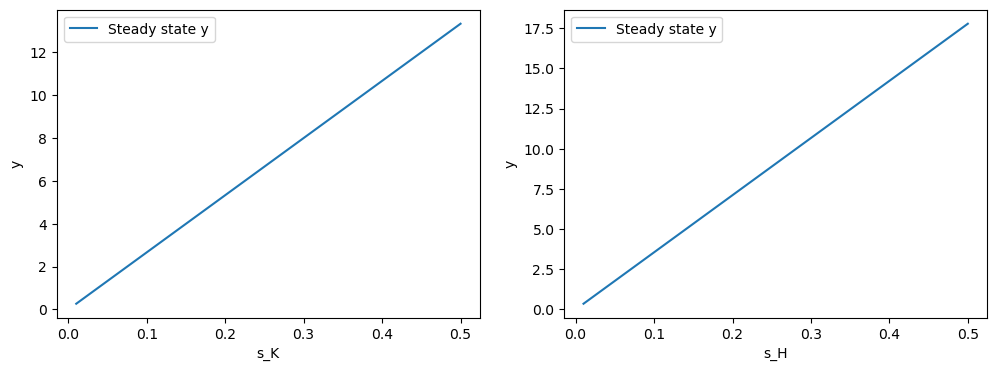

In [10]:
# Setting a range of values for s_K and s_H respectively
s_K_values = np.linspace(0.01, 0.5, 100)
s_H_values = np.linspace(0.01, 0.5, 100)

# Initializing arrays to store steady state y values
ss_y_s_K = np.zeros_like(s_K_values)
ss_y_s_H = np.zeros_like(s_H_values)

# Solving the model for each value of s_K
for i, s_K in enumerate(s_K_values):
    objective = lambda x: [trans_eqs(x[0], x[1], new_alpha, new_phi, s_K, new_s_H, new_n, new_g, new_delta)]
    solution = optimize.root(objective, [1, 1], method='broyden1', options={'maxiter': 1000})
    ss_y_s_K[i] = solution.x[0]**new_alpha * solution.x[1]**new_phi

# Solving the model for each value of s_H
for i, s_H in enumerate(s_H_values):
    objective = lambda x: [trans_eqs(x[0], x[1], new_alpha, new_phi, new_s_K, s_H, new_n, new_g, new_delta)]
    solution = optimize.root(objective, [1, 1], method='broyden1', options={'maxiter': 1000})
    ss_y_s_H[i] = solution.x[0]**new_alpha * solution.x[1]**new_phi

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(s_K_values, ss_y_s_K, label='Steady state y')
ax[0].set_xlabel('s_K')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].plot(s_H_values, ss_y_s_H, label='Steady state y')
ax[1].set_xlabel('s_H')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

It can be seen that the steady state level is increasing in both of the savingsrates when holding the other constant.

Now we check how it changes when varying both at the same time:

C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:6: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_k = (1 / ((1 + n) * (1 + g))) * (s_K * k**alpha * h**phi + (1 - delta) * k)-k
C:\Users\Bruger\AppData\Local\Temp\ipykernel_20892\3821288623.py:9: RuntimeWarning: invalid value encountered in double_scalars
  trans_eq_h = (1 / ((1 + n) * (1 + g))) * (s_H * k**alpha * h**phi + (1 - delta) * h)-h


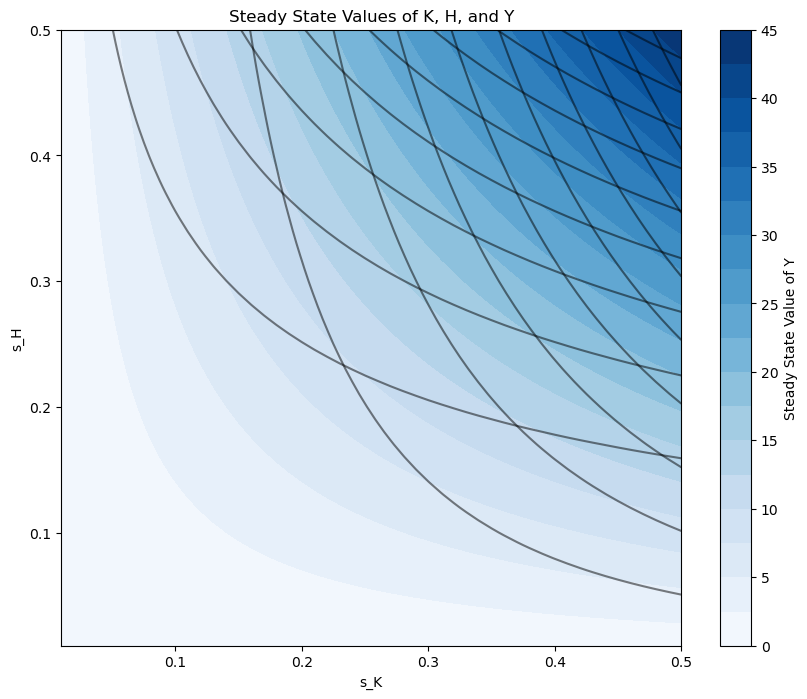

In [11]:
# Define range of s_K and s_H values
s_K_range = np.linspace(0.01, 0.5, 50)
s_H_range = np.linspace(0.01, 0.5, 50)

# Create empty arrays to store results
ss_k_values = np.zeros((len(s_K_range), len(s_H_range)))
ss_h_values = np.zeros((len(s_K_range), len(s_H_range)))
ss_y_values = np.zeros((len(s_K_range), len(s_H_range)))

# Loop through s_K and s_H values and calculate steady state values
for i, s_K in enumerate(s_K_range):
    for j, s_H in enumerate(s_H_range):
        # Define function to be optimized
        objective = lambda x: [trans_eqs(x[0], x[1], new_alpha, new_phi, s_K, s_H, new_n, new_g, new_delta)]
        # Solve for steady state values of k and h
        solution = optimize.root(objective, [1, 1], method='broyden1', options={'maxiter': 1000})
        ss_k = solution.x[0]
        ss_h = solution.x[1]
        # Calculate steady state value of y
        ss_y = ss_k**new_alpha * ss_h**new_phi
        # Store results in arrays
        ss_k_values[i, j] = ss_k
        ss_h_values[i, j] = ss_h
        ss_y_values[i, j] = ss_y

# Create contour plot of steady state values
fig, ax = plt.subplots(figsize=(10, 8))
cs = ax.contourf(s_K_range, s_H_range, ss_y_values, levels=20, cmap='Blues')
ax.contour(s_K_range, s_H_range, ss_k_values, levels=10, colors='black', alpha=0.5)
ax.contour(s_K_range, s_H_range, ss_h_values, levels=10, colors='black', alpha=0.5)
cbar = plt.colorbar(cs)
cbar.set_label('Steady State Value of Y')
ax.set_xlabel('s_K')
ax.set_ylabel('s_H')
ax.set_title('Steady State Values of K, H, and Y')
plt.show()


From this it can be seen that there is good reason to set the two savingsrates equal to eachother, as there is no benifit from investing more in one capital than the other. It is optimal to invest equally in both. 

This is pretty obviously given by the parameters alpha and phi which are both set to 1/3. These are the marginal marginal products of human capital and phisical capital. As these are equal so should the savingsrates.

# Conclusion

Using numerical optimization we were able to confirm the results of the analytical solution to the Solow-model with human capital.

Furthermore it was whoen using optimize.root that it is optimal given to set the savingsrates on human and physical capital equal to eachother when $\alpha = \varphi$.
    